In [96]:
from __future__ import division

In [164]:
%matplotlib inline
%autoreload 2

In [98]:
import matplotlib.pyplot as plt 

In [99]:
import sys
sys.path.append("../")

In [321]:
import get_gal_centroids as get_gal
from test_peak_methods import draw_gaussian
from plot_gal_prop import plot_cf_contour
import compare_peak_methods as compare
from compare_peak_methods import one_big_gaussian_one_small_gaussian as \
    bimodal_gaussian

In [101]:
from get_gal_centroids import shrinking_apert 

# compare the confidence regions of different methods

In [127]:
bootNo = 100
data_size = 500

In [128]:
lvls = [68, 95]
# prepare the colors for the confidence regions
g_colors = [(0 / 255., i / (len(lvls) + 1.), 0 / 255.) 
          for i in range(1, len(lvls) + 1)]

b_colors = [(0 / 255., 0 / 255., i / (len(lvls) + 1.)) 
          for i in range(1, len(lvls) + 1)]

r_colors = [( i / (len(lvls) + 1.), 0 / 255., 0 / 255.) 
            for i in range(1, len(lvls) + 1)]

In [129]:
np.random.seed(1)

## confidence region of shrinking aperture

In [348]:
gauss_data, shrink_peak_dens, KDE_peak_dens, cent_peak_dens = \
    compare.call_gaussian_and_prepare_data(data_size=500, bootNo=100)

##  Combined all the confidence regions

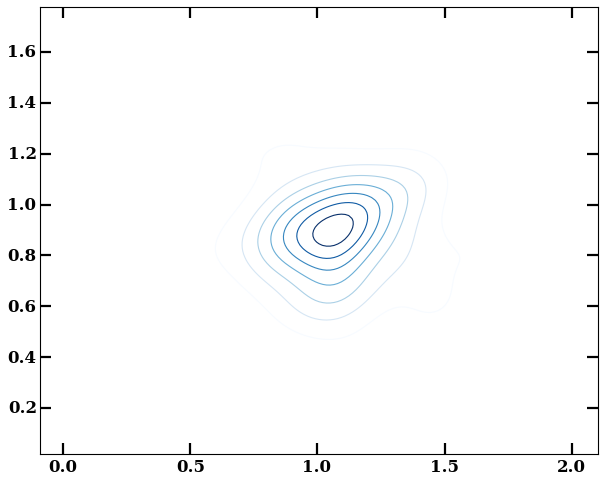

In [369]:
plt.contour(shrink_peak_dens["eval_points"][0],
           shrink_peak_dens["eval_points"][1],
           shrink_peak_dens["estimate"],
           label="shrink")
plt.legend(loc='best')

saving figure to../../paper/figures/drafts/gauss500.pdf


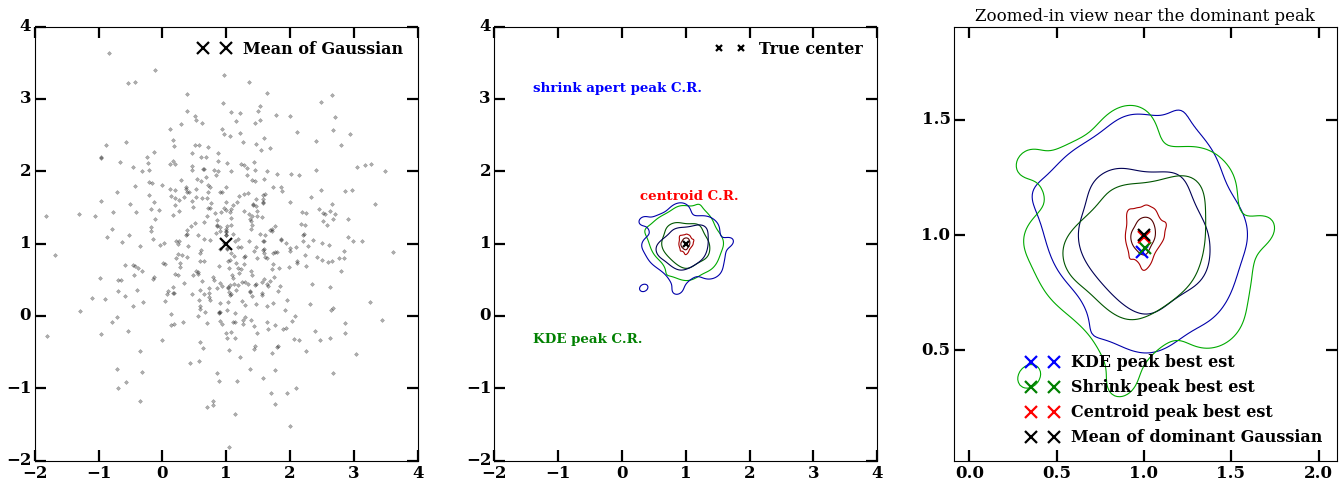

In [366]:
compare.plot_gauss_500_comparison(gauss_data, shrink_peak_dens, KDE_peak_dens,
                                  cent_peak_dens)

# Test 2 - one big gaussian, one small close by gaussian

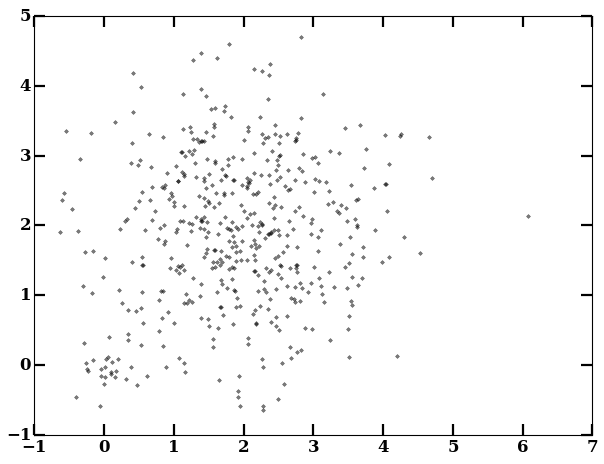

In [116]:
plt.axes().set_aspect('equal')

biData = bimodal_gaussian(data_size, contaminant_fraction=0.05)
plt.plot(biData[:, 0], biData[:, 1], 'k.',
         alpha=0.5)

In [141]:
bimodal_data = [bimodal_gaussian(data_size=500) for i in range(bootNo)]

## shrinking aperture estimates

In [149]:
shrink_peaks = np.array([shrinking_apert(bi_data) 
                        for bi_data in bimodal_data])
shrink_peak_dens1 = get_gal.do_KDE(shrink_peaks)
shrink_peak_dens1 = get_gal.convert_fhat_to_dict(shrink_peak_dens1)
get_gal.find_peaks_from_py_diff(shrink_peak_dens1)

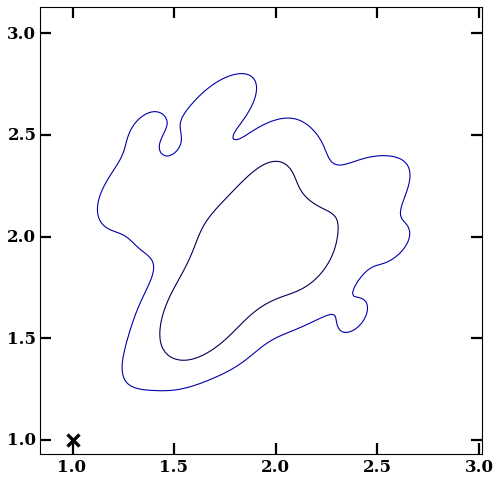

In [150]:
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens1["estimate"],
                shrink_peak_dens1["eval_points"][0],
                shrink_peak_dens1["eval_points"][1],
                colors=b_colors)
plt.plot(1, 1, "kx", mew=3, label="True center", markersize=10)

## compute the confidence region for the KDE 

In [144]:
KDE_fhat1 = [get_gal.do_KDE_and_get_peaks(g_data) 
             for g_data in bimodal_data]
KDE_peaks1 = np.array([np.array([fhat1["peaks_xcoords"][0], 
                                 fhat1["peaks_ycoords"][0]]) 
                       for fhat1 in KDE_fhat1])

In [145]:
KDE_peak_dens1 = get_gal.do_KDE(KDE_peaks1)
KDE_peak_dens1 = get_gal.convert_fhat_to_dict(KDE_peak_dens1)
get_gal.find_peaks_from_py_diff(KDE_peak_dens1)

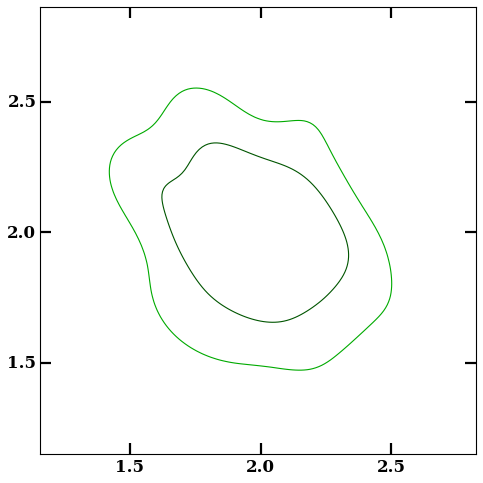

In [146]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens1["estimate"],
                KDE_peak_dens1["eval_points"][0],
                KDE_peak_dens1["eval_points"][1],
                colors=g_colors)

## compute confidence regions for centroids 

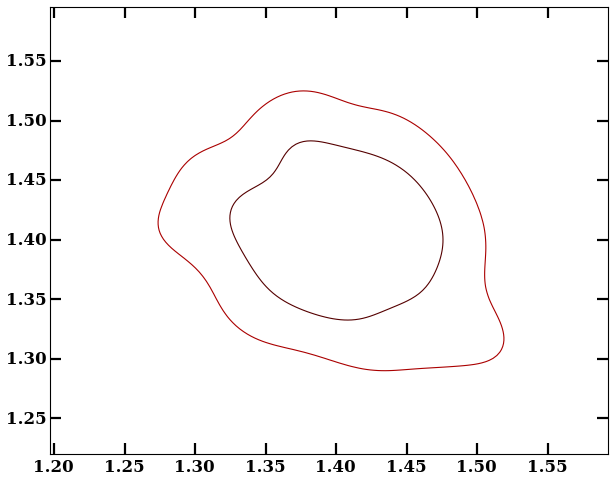

In [147]:
cent_fhat1 = [get_gal.compute_weighted_centroids(g_data) 
             for g_data in bimodal_data]
cent_peak_dens1 = get_gal.do_KDE(cent_fhat1)
cent_peak_dens1 = get_gal.convert_fhat_to_dict(cent_peak_dens1)
get_gal.find_peaks_from_py_diff(cent_peak_dens1)
plot_cf_contour(cent_peak_dens1["estimate"],
                cent_peak_dens1["eval_points"][0],
                cent_peak_dens1["eval_points"][1],
                colors=r_colors)

## combine all the contours

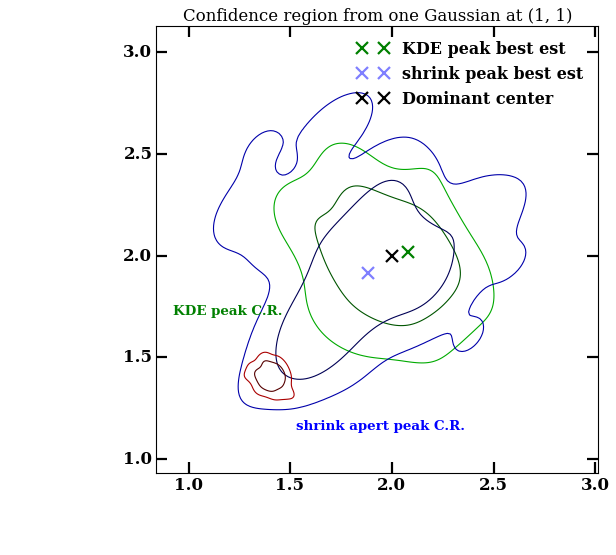

In [151]:
plt.axes().set_aspect('equal')
plot_cf_contour(KDE_peak_dens1["estimate"],
                KDE_peak_dens1["eval_points"][0],
                KDE_peak_dens1["eval_points"][1],
                colors=g_colors)
plt.plot(KDE_peak_dens1["peaks_xcoords"][0],
         KDE_peak_dens1["peaks_ycoords"][0],
         'gx', mew=2, markersize=10,
         label="KDE peak best est")
plt.figtext(0.23, 0.4, 'KDE peak C.R.', color='g')
plt.axes().set_aspect('equal')
plot_cf_contour(shrink_peak_dens1["estimate"],
                shrink_peak_dens1["eval_points"][0],
                shrink_peak_dens1["eval_points"][1],
                colors=b_colors)
plt.plot(shrink_peak_dens1["peaks_xcoords"][0],
         shrink_peak_dens1["peaks_ycoords"][0],
         'bx', mew=2, markersize=10, alpha=0.5,
         label="shrink peak best est")
plt.figtext(0.4, 0.2, 'shrink apert peak C.R.', 
            color='b')

plot_cf_contour(cent_peak_dens1["estimate"],
                cent_peak_dens1["eval_points"][0],
                cent_peak_dens1["eval_points"][1],
                colors=r_colors)

plt.annotate('centroid C.R.', (0.38, 0.6), 
             textcoords='axes fraction',
             color='r')
plt.plot(2, 2, "kx", mew=2, label="Dominant center", markersize=10,
        fillstyle='none')
plt.legend(loc='best', frameon=False)
plt.title('Confidence region from one Gaussian at (1, 1)',
          fontsize=15) 

# draw dumbbell data and get estimates from different methods

In [339]:
dumb_data, shrink_peak_dens2, KDE_peak_dens2, KDE_peak_dens2b, cent_peak_dens2 = \
    compare.call_dumbbell_example_and_prepare_data(data_size=500, bootNo=200)

## combined contours of all methods

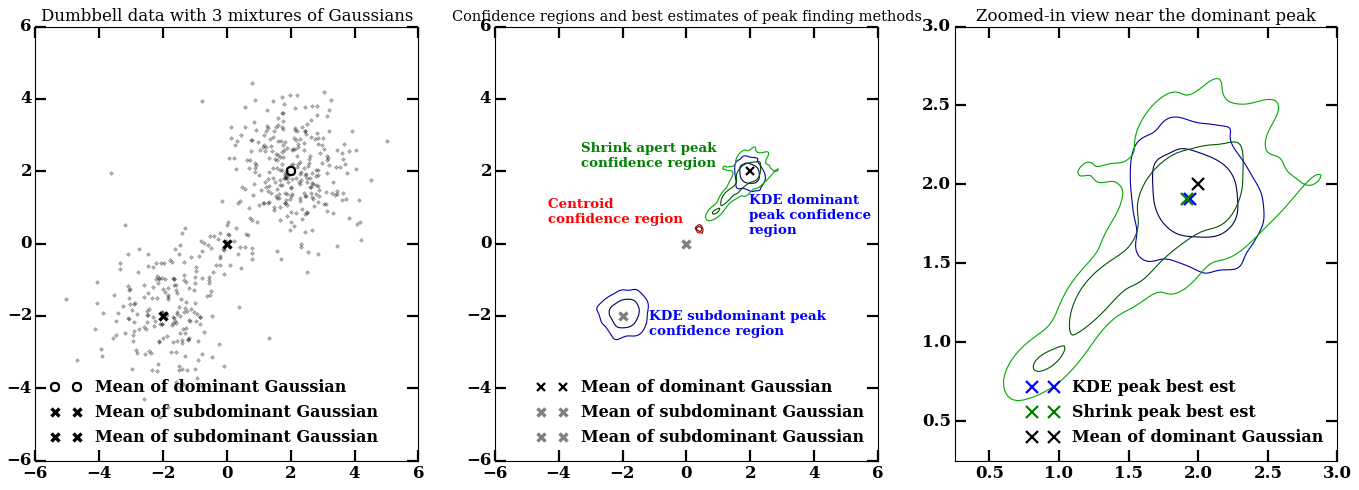

In [347]:
compare.plot_dumbbell_500_comparison(
    dumb_data, shrink_peak_dens2, KDE_peak_dens2, 
    KDE_peak_dens2b, cent_peak_dens2,
    plot_path="../../paper/figures/drafts/",
    plot_fig_name="confidence_regions_dumbbell_500.pdf")

If you want to see the source code of `compare.plot_dumbbell_500_comparison` execute the following line
```
%psource compare.plot_dumbbell_500_comparison
```